# Load Dataset


In [21]:
# Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Display the first few rows of the dataframe
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

# Handle Missing Values


In [22]:
# Handle Missing Values
print("Before handling missing values:")
print(df.isnull().sum())

df.dropna(subset=['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'title_year'], inplace=True)
df.loc[:, 'gross'] = df['gross'].fillna(df['gross'].median())
df.loc[:, 'budget'] = df['budget'].fillna(df['budget'].median())
df.loc[:, 'aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].mode()[0])
df.loc[:, 'content_rating'] = df['content_rating'].fillna('Not Rated')
df.loc[:, 'color'] = df['color'].fillna(df['color'].mode()[0])
df.loc[:, 'num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df.loc[:, 'duration'] = df['duration'].fillna(df['duration'].median())
df.loc[:, 'actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df.loc[:, 'actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df.loc[:, 'facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df.loc[:, 'plot_keywords'] = df['plot_keywords'].fillna('Unknown')
df.loc[:, 'num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())
df.loc[:, 'language'] = df['language'].fillna(df['language'].mode()[0])
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])


Before handling missing values:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [23]:

print("After handling missing values:")
print(df.isnull().sum())

After handling missing values:
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


# Remove Duplicates


In [24]:
# Remove Duplicates
print("Before removing duplicates:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("After removing duplicates:")
print(df.duplicated().sum())

Before removing duplicates:
44
After removing duplicates:
0


# Handle Inconsistent Data


In [25]:
# Handle Inconsistent Data
print("Before handling inconsistent data:")
print(df['content_rating'].value_counts())

df['content_rating'] = df['content_rating'].replace({
    'X': 'NC-17',
    'Approved': 'PG',
    'Passed': 'PG',
    'GP': 'PG',
    'M': 'PG'
})


Before handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            698
Not Rated     365
G             112
Unrated        60
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


In [26]:

print("After handling inconsistent data:")
print(df['content_rating'].value_counts())

After handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            773
Not Rated     365
G             112
Unrated        60
NC-17          20
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


# Save Cleaned Data


In [27]:
# Save Cleaned Data
df.to_csv('movie_metadata_cleaned.csv', index=False)

# Pearson Correlation


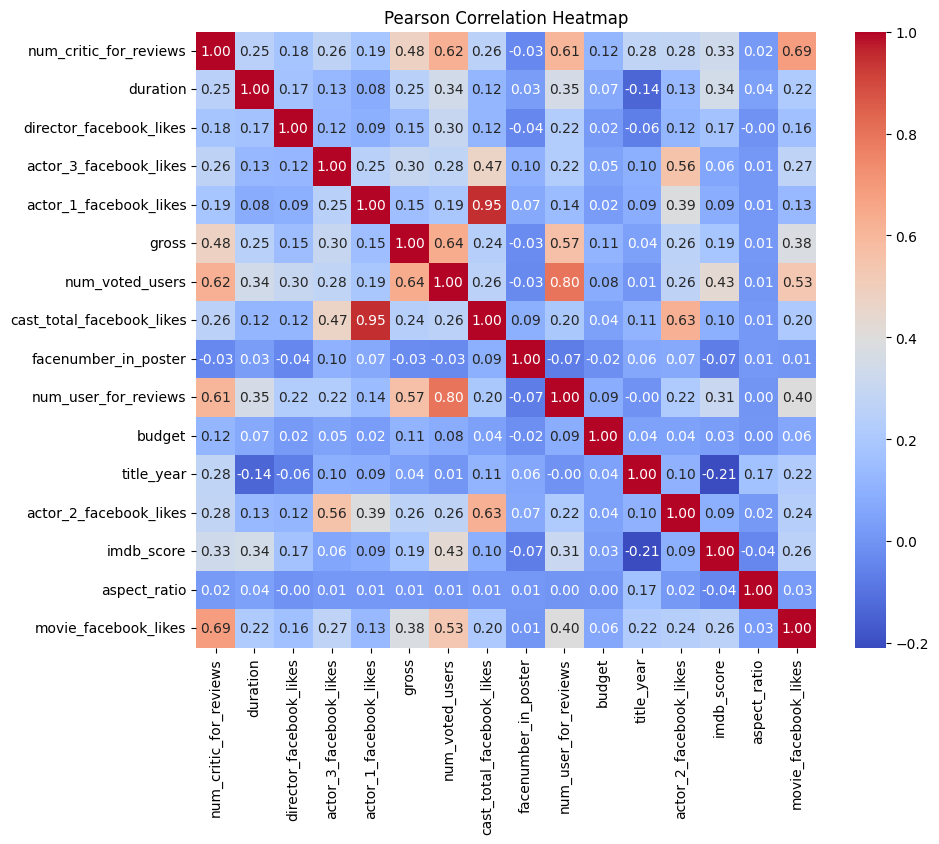

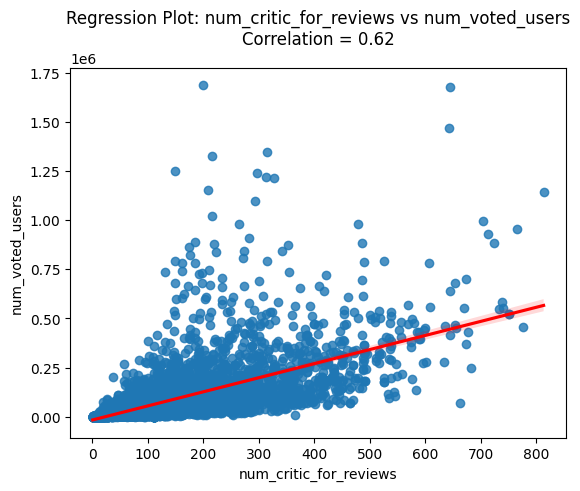

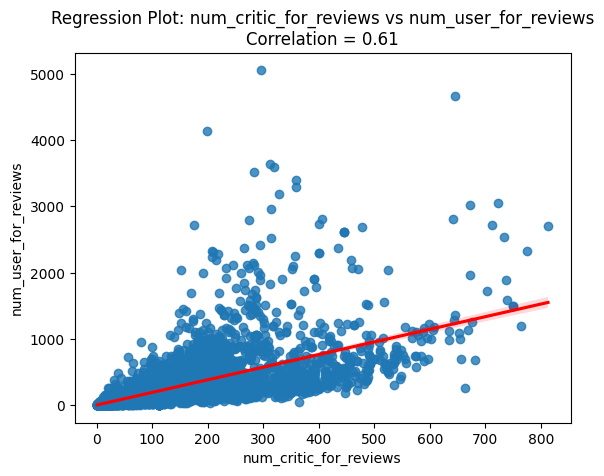

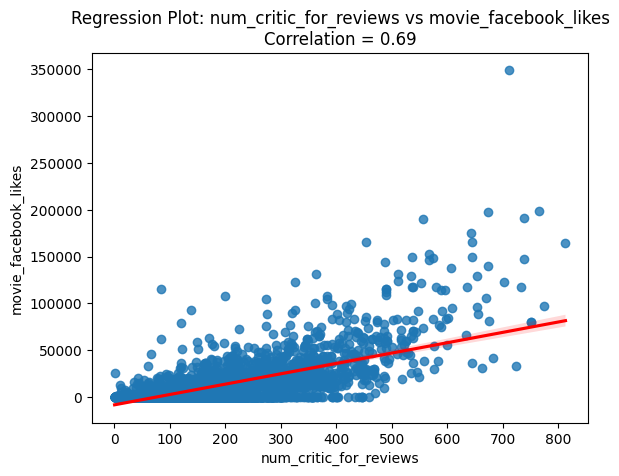

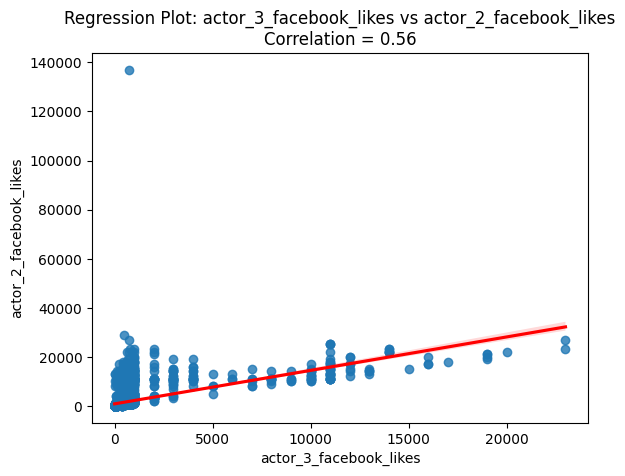

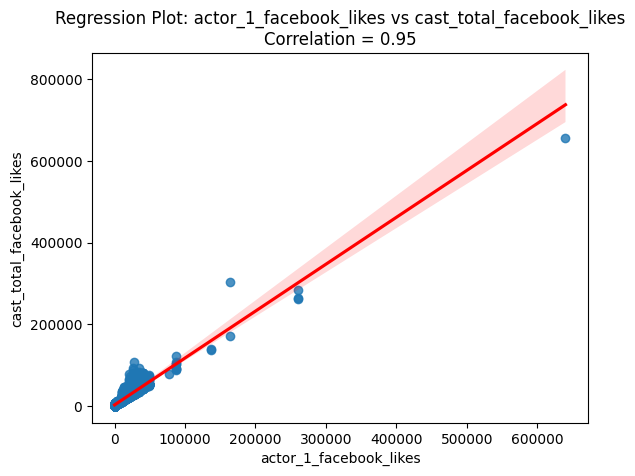

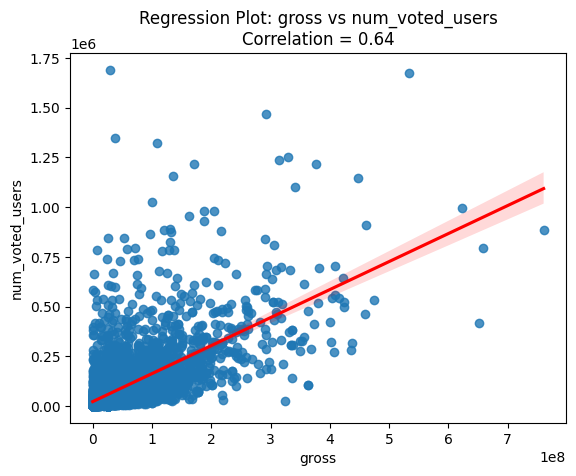

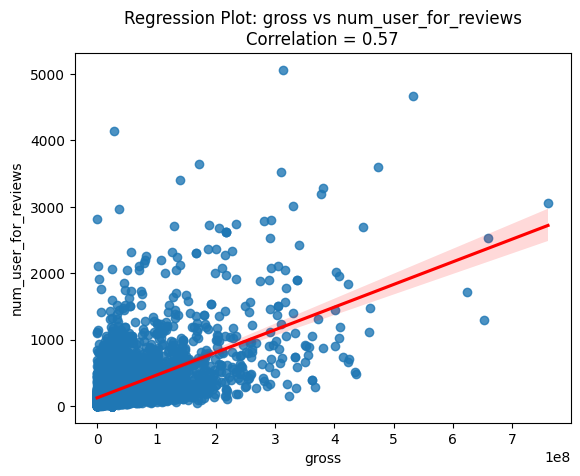

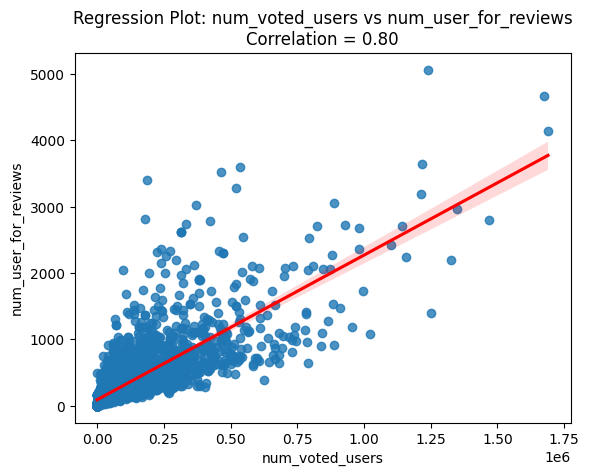

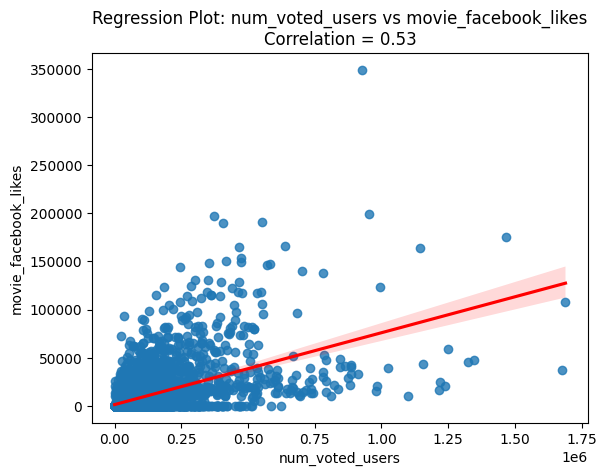

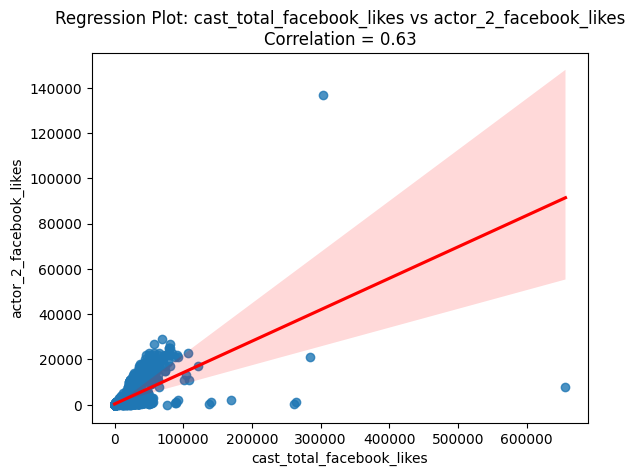

In [28]:
# Pearson Correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix_pearson = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_pearson.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Spearman Correlation


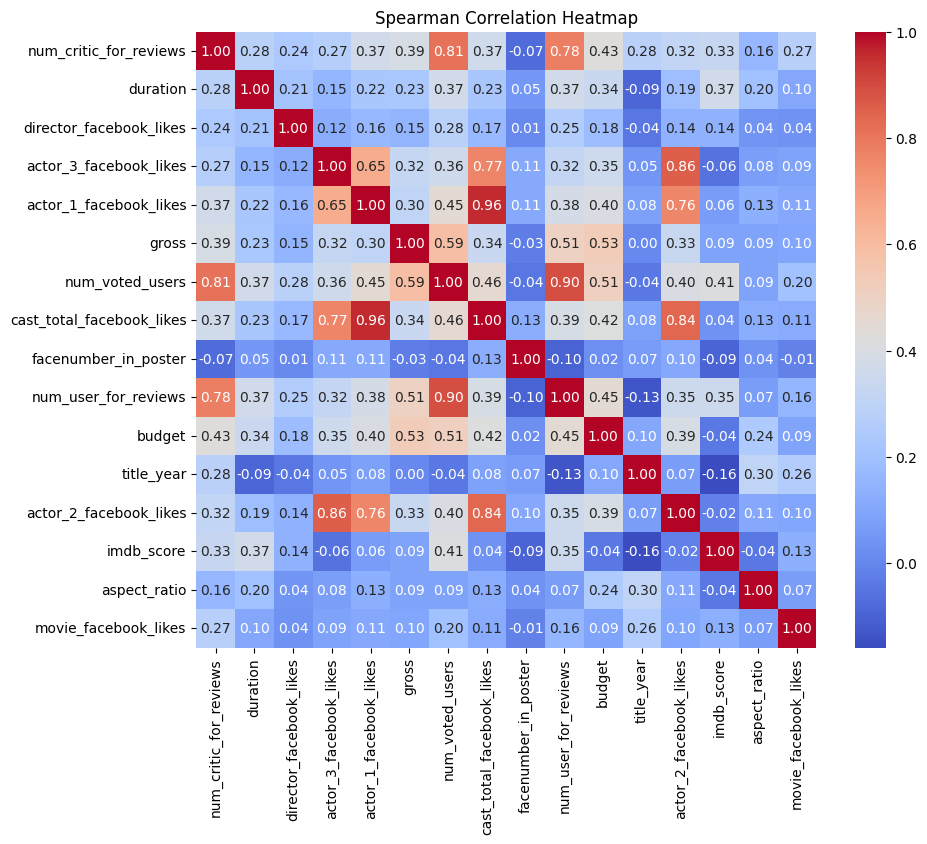

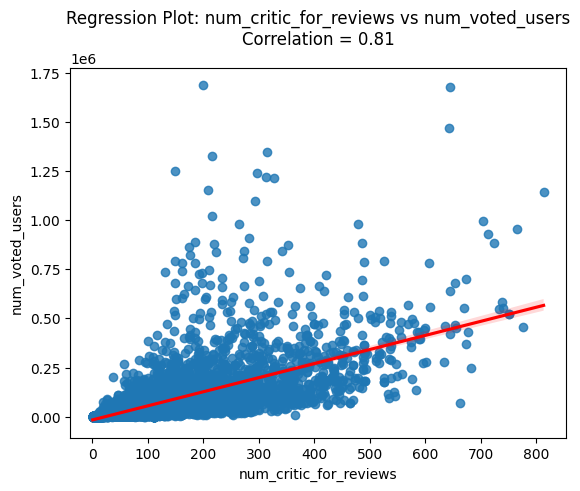

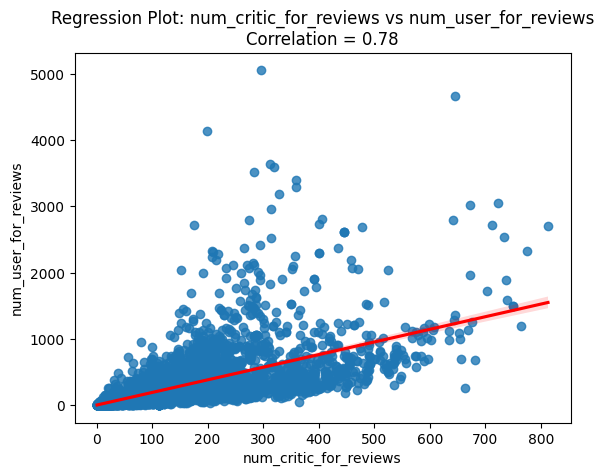

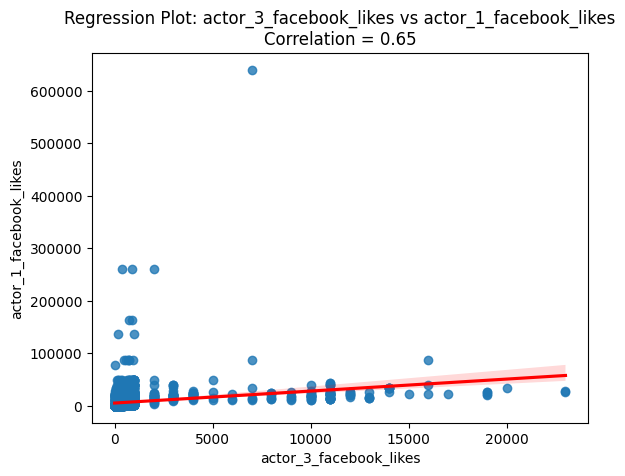

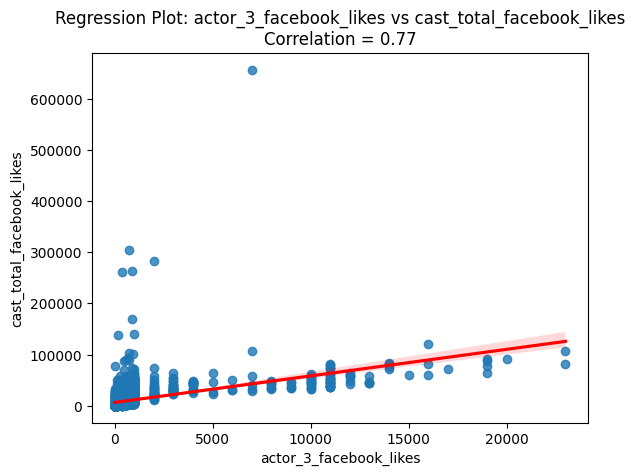

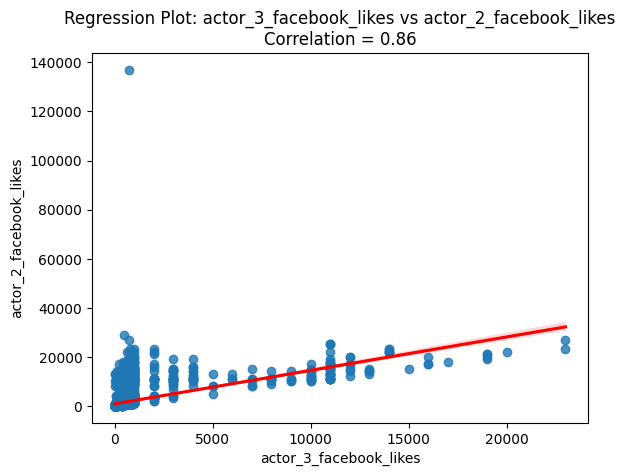

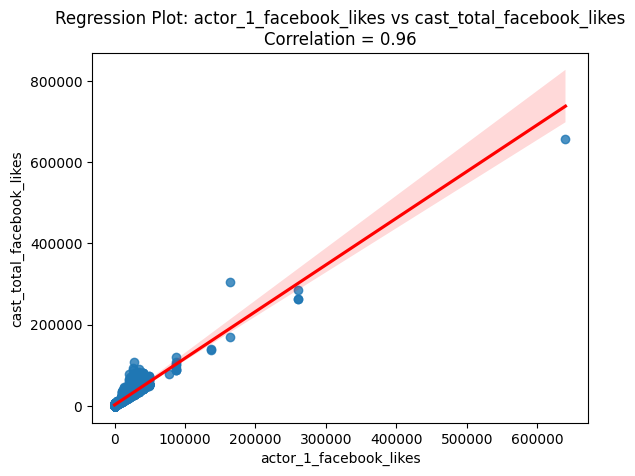

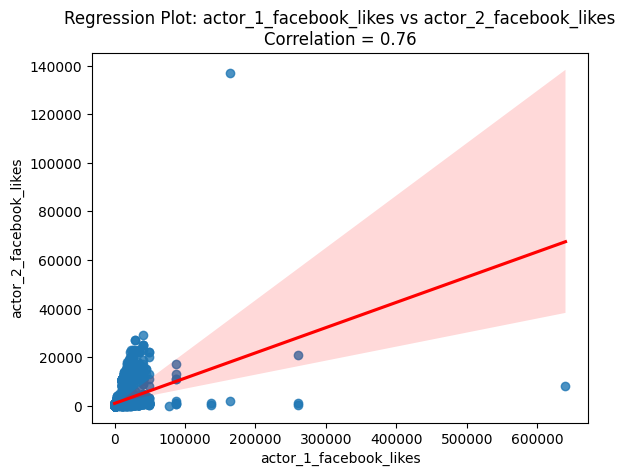

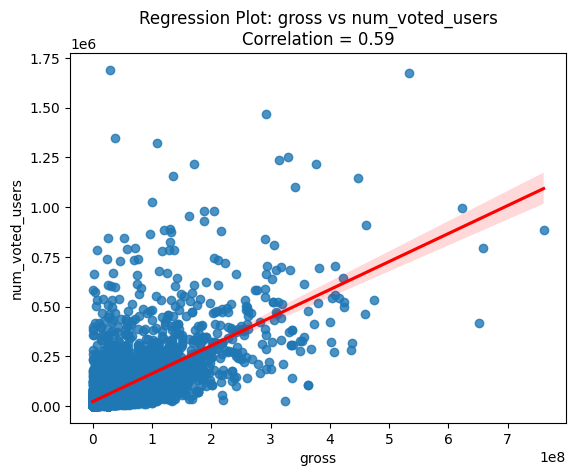

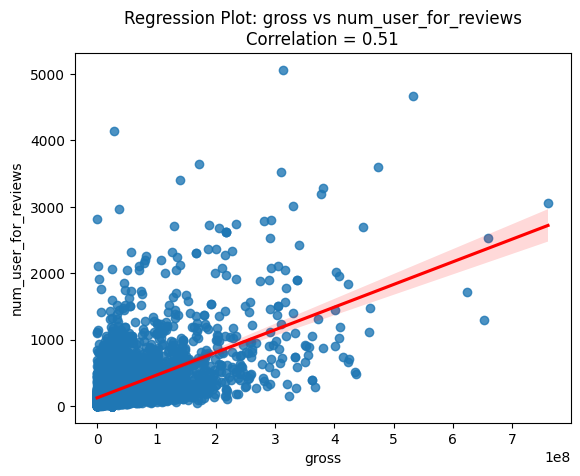

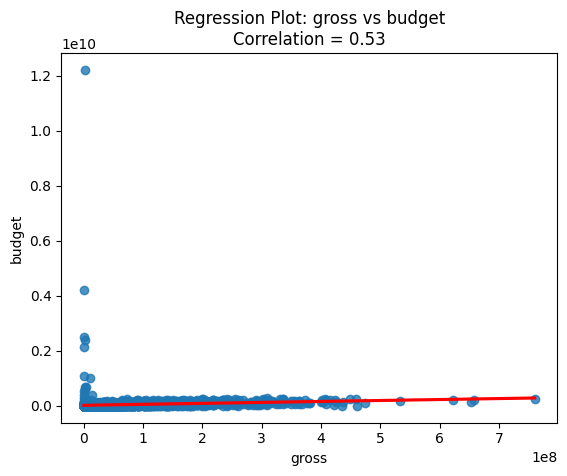

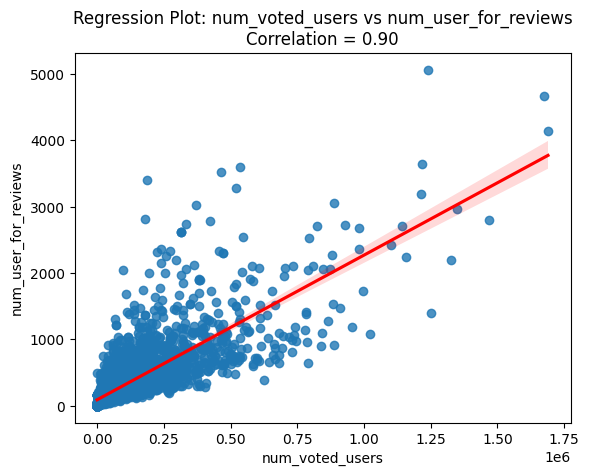

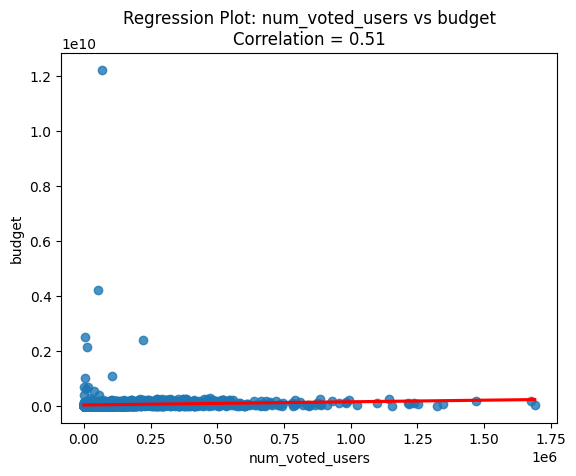

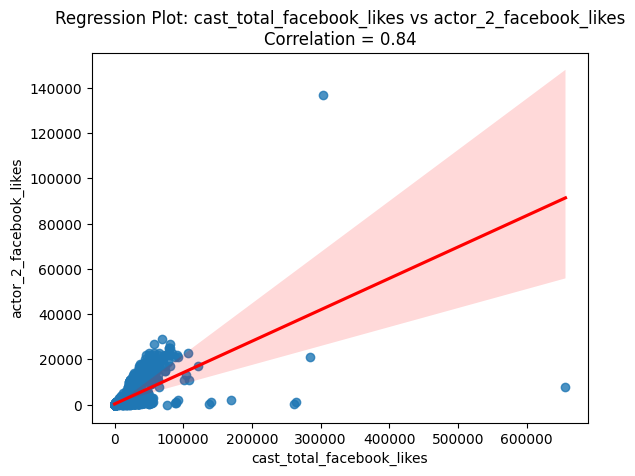

In [29]:
# Spearman Correlation
correlation_matrix_spearman = numeric_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_spearman.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Kendall Correlation


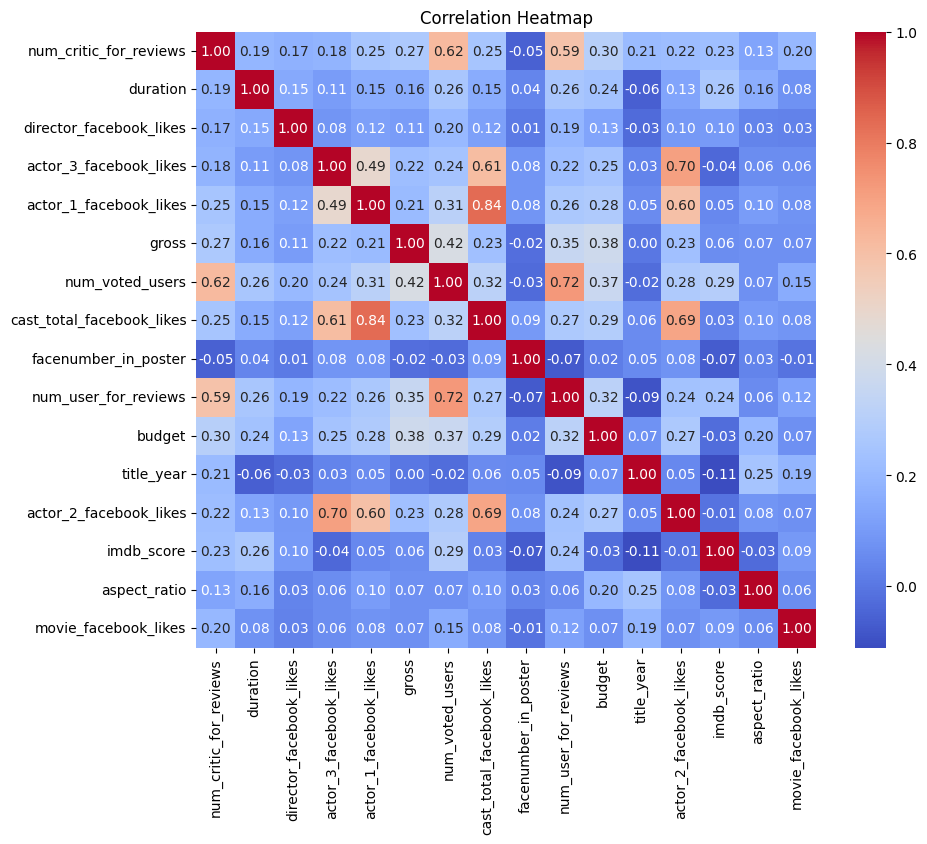

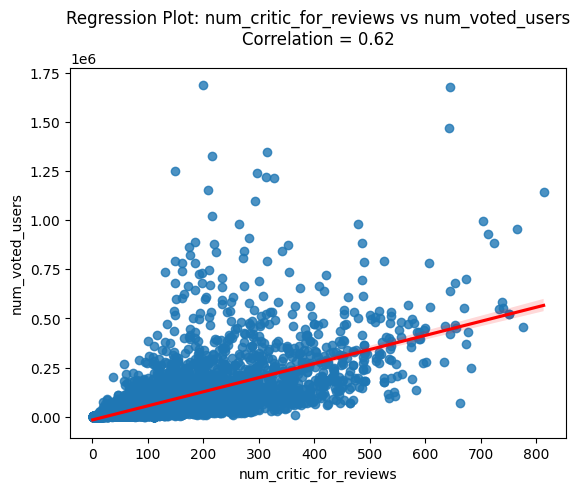

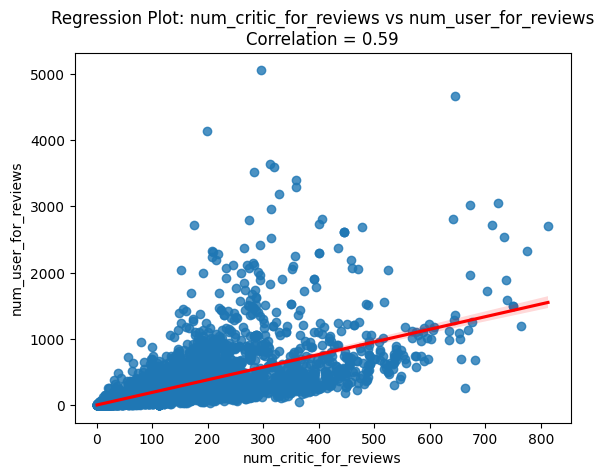

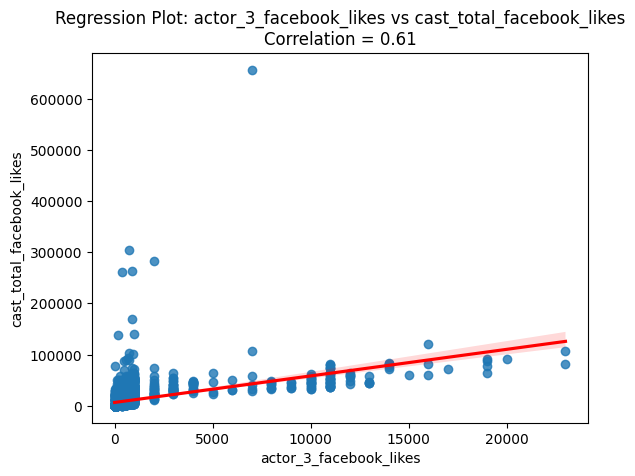

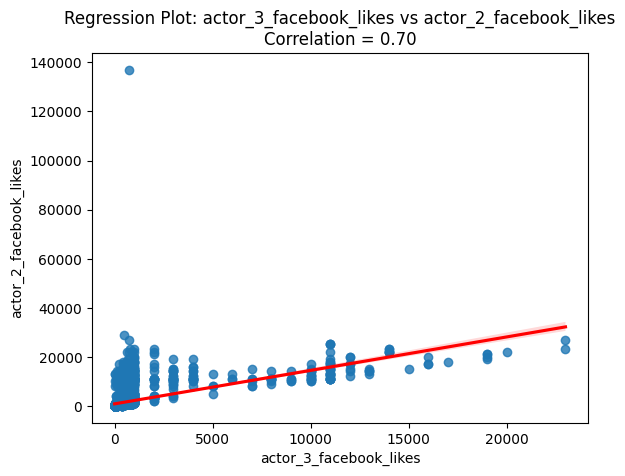

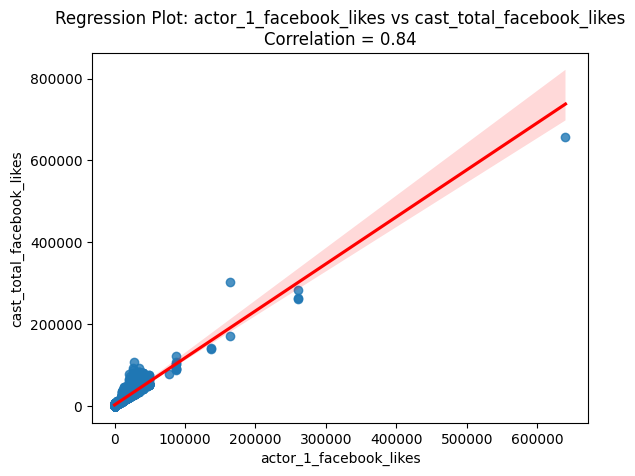

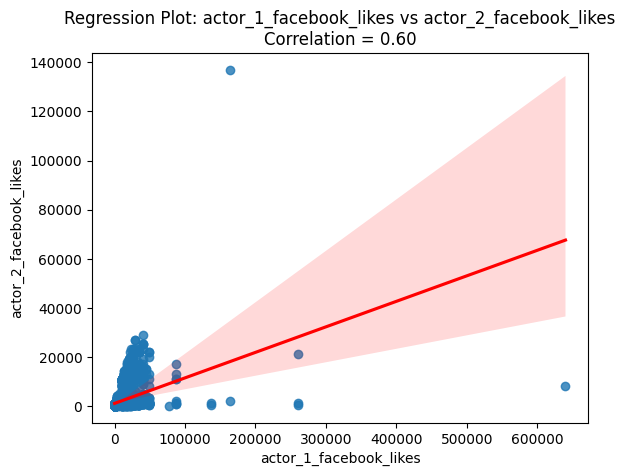

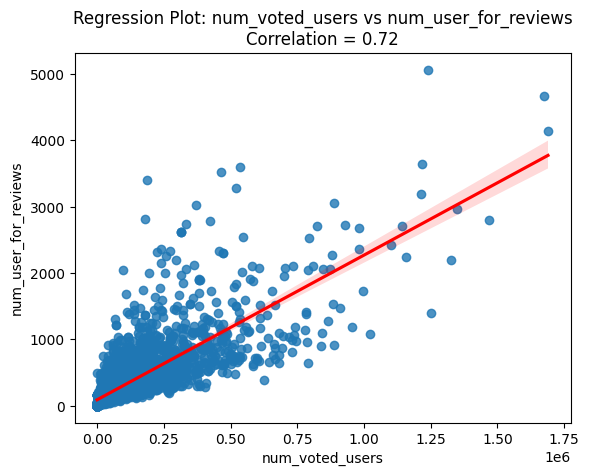

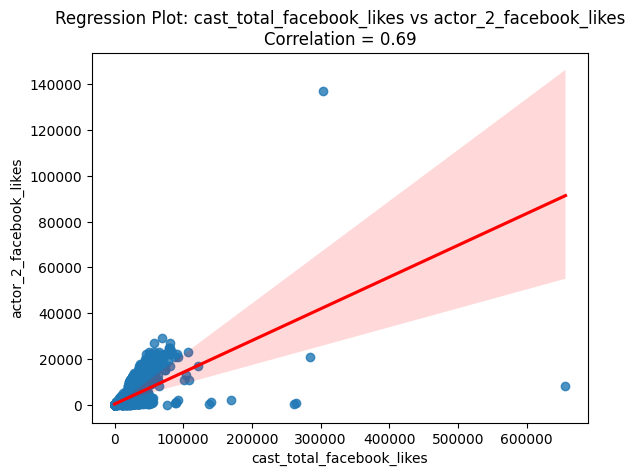

In [30]:
# Kendall Correlation
correlation_matrix_kendall = numeric_df.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_kendall.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Scatterplot


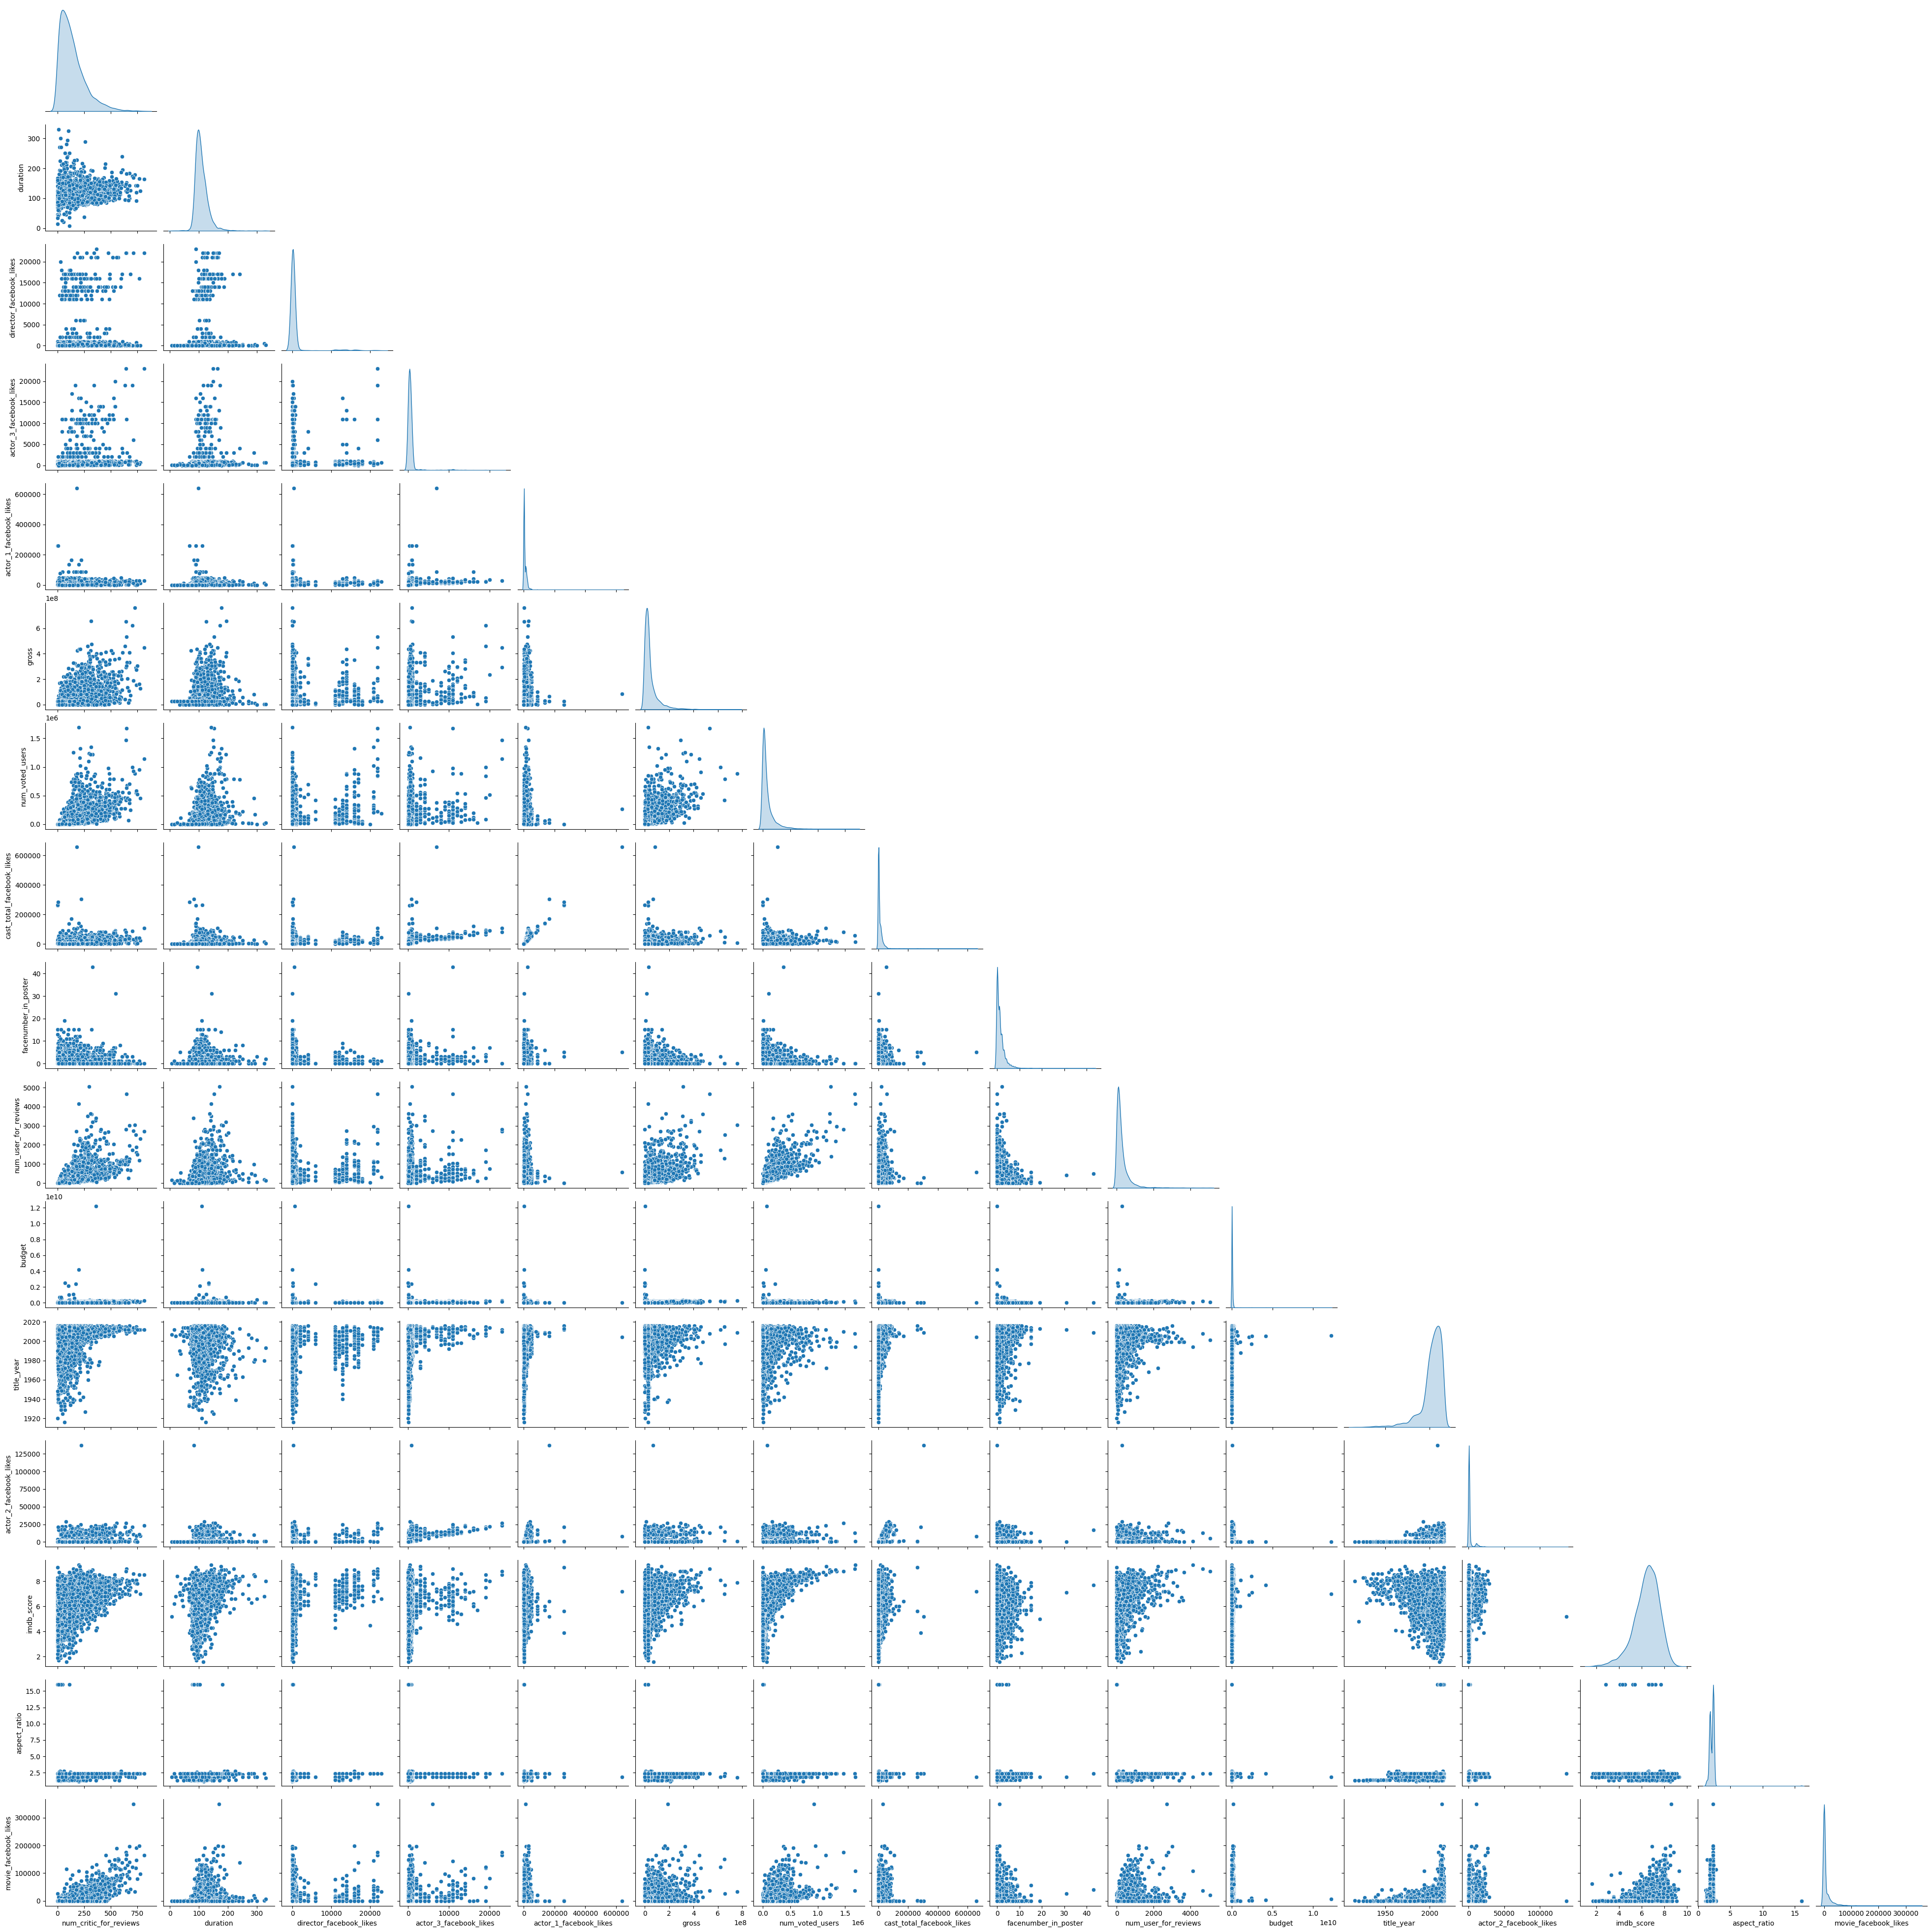

In [31]:
# Scatterplot
sns.pairplot(numeric_df, diag_kind='kde', kind='scatter', corner=True)
plt.show()

# Matrix Comparison


In [32]:
# Matrix Comparison
diff_pearson_spearman = correlation_matrix_pearson - correlation_matrix_spearman
diff_spearman_kendall = correlation_matrix_spearman - correlation_matrix_kendall

print("Difference between Pearson and Spearman:\n", diff_pearson_spearman)
print("Difference between Spearman and Kendall:\n", diff_spearman_kendall)

Difference between Pearson and Spearman:
                            num_critic_for_reviews  duration  \
num_critic_for_reviews                   0.000000 -0.027591   
duration                                -0.027591  0.000000   
director_facebook_likes                 -0.056699 -0.032350   
actor_3_facebook_likes                  -0.002545 -0.026040   
actor_1_facebook_likes                  -0.182140 -0.141012   
gross                                    0.092541  0.014381   
num_voted_users                         -0.188061 -0.027385   
cast_total_facebook_likes               -0.108222 -0.106325   
facenumber_in_poster                     0.039050 -0.021194   
num_user_for_reviews                    -0.176180 -0.014695   
budget                                  -0.308591 -0.268349   
title_year                              -0.006283 -0.045576   
actor_2_facebook_likes                  -0.037150 -0.053202   
imdb_score                               0.005388 -0.025596   
aspect_ratio 

# Outliers and Cleaning


      num_critic_for_reviews  duration  director_facebook_likes  \
0                   4.800048  3.094530                 0.244431   
1                   1.320896  2.695522                 0.045152   
2                   3.800102  1.764504                 0.244431   
3                   5.543810  2.473851                 7.542672   
5                   2.643139  1.055156                 0.076300   
...                      ...       ...                      ...   
5037                1.059142  0.585210                 0.244431   
5038                1.166575  0.939884                 0.243723   
5040                1.067406  1.427560                 0.244431   
5041                1.059142  0.363539                 0.244431   
5042                0.819486  0.806881                 0.238767   

      actor_3_facebook_likes  actor_1_facebook_likes      gross  \
0                   0.126143                0.373325  11.362890   
1                   0.213602                2.192629   4.2005

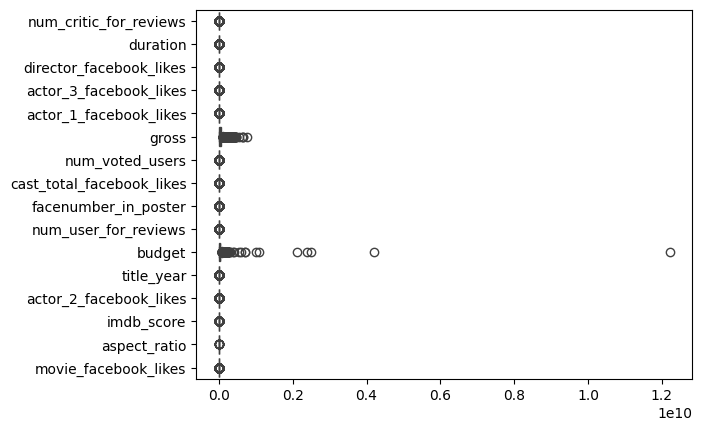

Shape After Removing Outliers (Z-Score): (4020, 16)


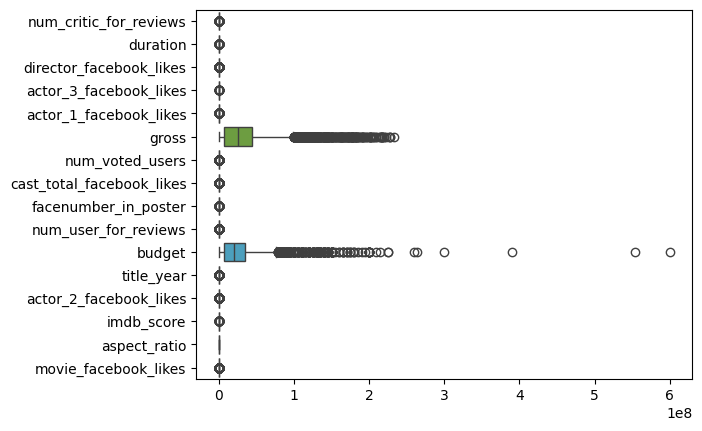

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4020.000000  4020.000000              4020.000000   
mean               125.072886   104.846766               141.433831   
std                 97.901227    16.619684               301.895762   
min                  1.000000    41.000000                 0.000000   
25%                 49.000000    93.000000                 7.000000   
50%                104.000000   102.000000                42.000000   
75%                176.000000   114.000000               160.000000   
max                495.000000   172.000000              6000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             4020.000000             4020.000000  4.020000e+03   
mean               401.390796             5240.161940  3.463192e+07   
std                372.989954             8185.032285  3.967700e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

In [33]:
# Outliers and Cleaning
from scipy.stats import zscore

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Z-Scores for each column
z_scores = np.abs(zscore(numeric_df))
print(z_scores)

# Identify rows with Z-Score > 3
outliers = np.where(z_scores > 3)
print("Outlier Locations:\n", outliers)

# Plot boxplot for numeric data
sns.boxplot(data=numeric_df, orient='h')
plt.show()

# Remove outliers
numeric_df_cleaned = numeric_df[(z_scores < 3).all(axis=1)]
print("Shape After Removing Outliers (Z-Score):", numeric_df_cleaned.shape)

# Plot boxplot for cleaned numeric data
sns.boxplot(data=numeric_df_cleaned, orient='h')
plt.show()

# Display basic statistics for cleaned numeric data
print(numeric_df_cleaned.describe())

# Point-Biserial Correlation


Point-Biserial Correlation Results:
      Binary Variable           Numeric Variable  Correlation        P-value
0        color_binary     num_critic_for_reviews    -0.022473   1.164463e-01
1        color_binary                   duration     0.051162   3.491705e-04
2        color_binary    director_facebook_likes     0.042185   3.200445e-03
3        color_binary     actor_3_facebook_likes    -0.031621   2.716508e-02
4        color_binary     actor_1_facebook_likes    -0.036945   9.841916e-03
5        color_binary                      gross    -0.047926   8.098656e-04
6        color_binary            num_voted_users     0.017785   2.141326e-01
7        color_binary  cast_total_facebook_likes    -0.043908   2.153133e-03
8        color_binary       facenumber_in_poster     0.000902   9.497846e-01
9        color_binary       num_user_for_reviews     0.043358   2.447251e-03
10       color_binary                     budget    -0.020066   1.610175e-01
11       color_binary                 ti

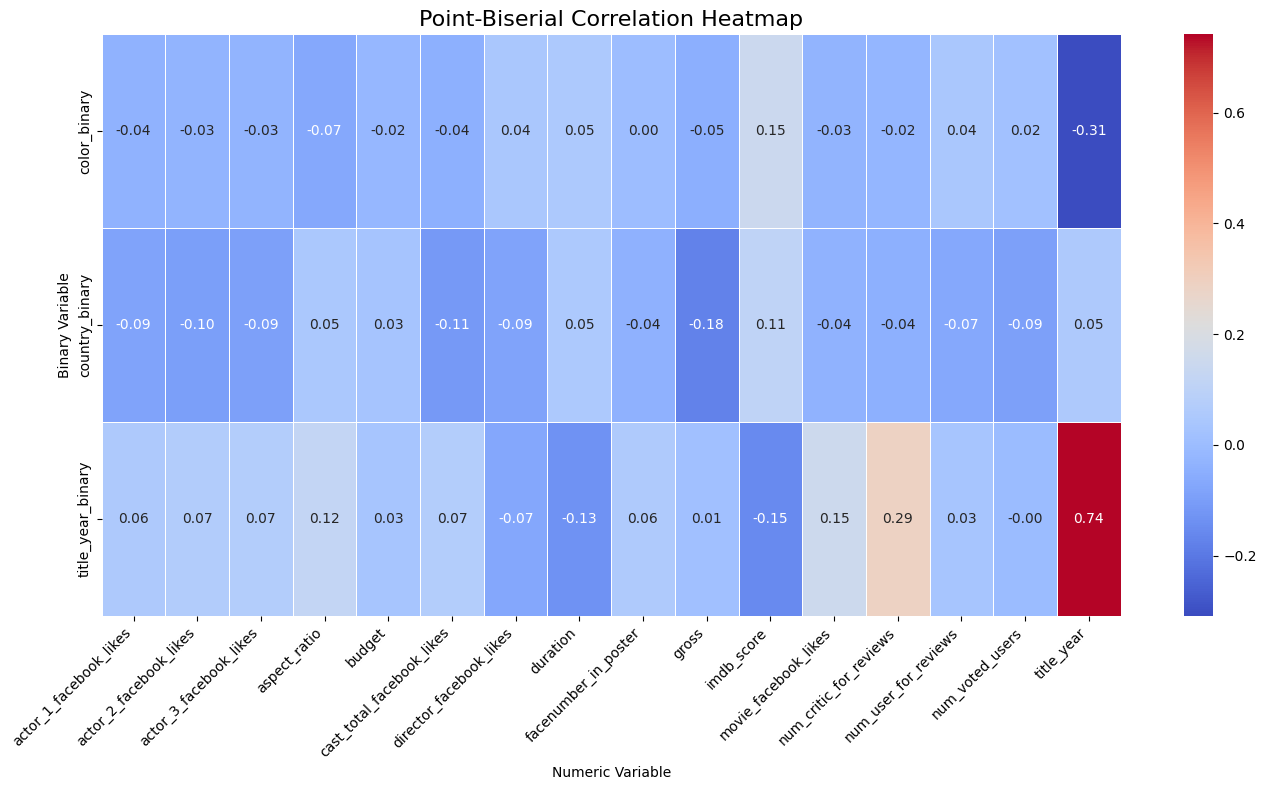

In [34]:
# Point-Biserial Correlation
from scipy.stats import pointbiserialr

# Transform columns to binary variables
df['color_binary'] = df['color'].apply(lambda x: 0 if x == 'Color' else 1)
df['country_binary'] = df['country'].apply(lambda x: 0 if x == 'USA' else 1)
df['title_year_binary'] = df['title_year'].apply(lambda x: 0 if x <= 1999 else 1)

binary_vars = ['color_binary', 'country_binary', 'title_year_binary']
numeric_vars = df.select_dtypes(include=['float64', 'int64']).drop(columns=binary_vars, errors='ignore').columns

pb_correlation_results = []

for binary_var in binary_vars:
    for numeric_var in numeric_vars:
        valid_data = df[[binary_var, numeric_var]].dropna()
        corr, p_value = pointbiserialr(valid_data[binary_var], valid_data[numeric_var])
        pb_correlation_results.append({
            'Binary Variable': binary_var,
            'Numeric Variable': numeric_var,
            'Correlation': corr,
            'P-value': p_value
        })

pb_correlation_df = pd.DataFrame(pb_correlation_results)

print("Point-Biserial Correlation Results:")
print(pb_correlation_df)

pb_correlation_df.to_csv("point_biserial_correlation_results.csv", index=False)
print("\nResults saved to 'point_biserial_correlation_results.csv'.")

heatmap_data = pb_correlation_df.pivot(index="Binary Variable", columns="Numeric Variable", values="Correlation")

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    annot_kws={"fontsize": 10}
)

plt.title("Point-Biserial Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

# Dendrogram for Numeric Variables


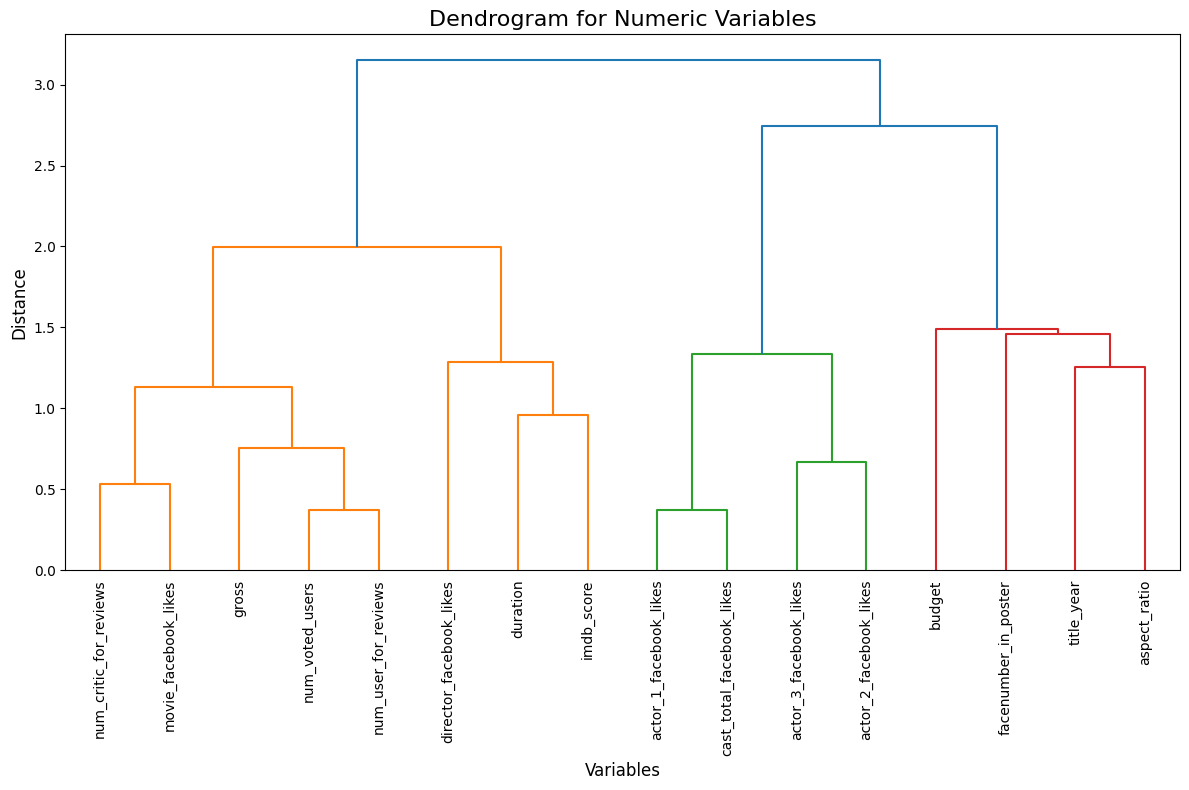

In [35]:
# Dendrogram for Numeric Variables
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
linkage_matrix = linkage(numeric_df.corr(method='pearson'), method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix, 
    labels=numeric_df.columns, 
    leaf_rotation=90,  # Rotate x-axis labels
    leaf_font_size=10  # Font size for x-axis labels
)

# Customize the title and labels
plt.title("Dendrogram for Numeric Variables", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.tight_layout()

# Show the dendrogram
plt.show()